# Part1: Data Preprocessing

## Import Packages and Loading The Data

In [ ]:
! nvidia-smi

Sun Dec 11 06:37:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
import os
import pathlib
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from tensorflow.keras.utils import image_dataset_from_directory as img_dir
from tensorflow.keras.preprocessing import  image_dataset_from_directory as img_dir

import tensorflow as tf
from tensorflow.keras import layers



In [5]:
od.download_kaggle_dataset( "https://www.kaggle.com/datasets/ibrahimserouis99/one-piece-image-classifier?search=image+class" ,"data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: mahmoudatiaeadatia
Your Kaggle Key: ··········


100%|██████████| 2.53G/2.53G [02:18<00:00, 19.6MB/s]


In [6]:
for dirpath, dirnames, filenames in os.walk("/content/data"):
  print(f"there is {len(dirnames)} dirs and {len(filenames)} files in {dirpath}")

there is 1 dirs and 0 files in /content/data
there is 1 dirs and 1 files in /content/data/one-piece-image-classifier
there is 1 dirs and 0 files in /content/data/one-piece-image-classifier/Data
there is 18 dirs and 0 files in /content/data/one-piece-image-classifier/Data/Data
there is 0 dirs and 651 files in /content/data/one-piece-image-classifier/Data/Data/Crocodile
there is 0 dirs and 648 files in /content/data/one-piece-image-classifier/Data/Data/Usopp
there is 0 dirs and 651 files in /content/data/one-piece-image-classifier/Data/Data/Mihawk
there is 0 dirs and 659 files in /content/data/one-piece-image-classifier/Data/Data/Zoro
there is 0 dirs and 651 files in /content/data/one-piece-image-classifier/Data/Data/Franky
there is 0 dirs and 648 files in /content/data/one-piece-image-classifier/Data/Data/Kurohige
there is 0 dirs and 651 files in /content/data/one-piece-image-classifier/Data/Data/Akainu
there is 0 dirs and 651 files in /content/data/one-piece-image-classifier/Data/Data/

## Exploring the data

Visualise some random images

In [7]:
def view_random_images( target_class):
  ''' visualise random images from our dataset '''
  # creating a list of targeted class images 
  images_list = os.listdir("/content/data/one-piece-image-classifier/Data/Data/{}".format(target_class))
  # choose a random image 
  rand_image = random.sample(images_list,1)[0]
  #plot the images
  img = mpimg.imread("/content/data/one-piece-image-classifier/Data/Data/{}/{}".format(target_class,rand_image))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print("the shape of the image is{}".format(img.shape))


  return img
     

the shape of the image is(173, 291, 3)


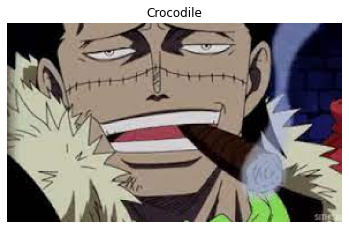

In [8]:
img = view_random_images("Crocodile")

In [9]:
os.listdir("/content/data/one-piece-image-classifier")

['Data', 'classnames.txt']

In [10]:
# reading class names
with open("/content/data/one-piece-image-classifier/classnames.txt", "r") as f :
  class_names = f.read()

In [11]:
class_names
class_list = [class_name.strip() for class_name in class_names.split("\n")]

In [12]:
class_list

['Ace',
 'Akainu',
 'Brook',
 'Chopper',
 'Crocodile',
 'Franky',
 'Jinbei',
 'Kurohige',
 'Law',
 'Luffy',
 'Mihawk',
 'Nami',
 'Rayleigh',
 'Robin',
 'Sanji',
 'Shanks',
 'Usopp',
 'Zoro']

the shape of the image is(168, 299, 3)


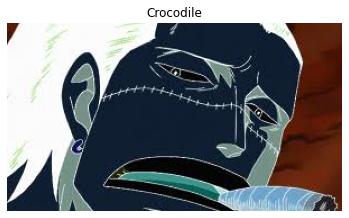

In [32]:
random_class = random.choice(class_list)
img = view_random_images(random_class)

## Image preprocessing

In [25]:
data_dir = pathlib.Path("/content/data/one-piece-image-classifier/Data/Data/")


In [15]:
data_dir

PosixPath('/content/data/one-piece-image-classifier/Data/Data')

In [16]:
train = img_dir("/content/data/one-piece-image-classifier/Data/Data",
     seed=123,
      label_mode="categorical",
      subset = "training",
      validation_split= 0.2
       )

Found 11737 files belonging to 18 classes.
Using 9390 files for training.


In [17]:
valid = img_dir("/content/data/one-piece-image-classifier/Data/Data",
      seed=123,
      label_mode="categorical",
      subset = "validation",
      validation_split= 0.2
       )

Found 11737 files belonging to 18 classes.
Using 2347 files for validation.


In [18]:
valid.class_names

['Ace',
 'Akainu',
 'Brook',
 'Chopper',
 'Crocodile',
 'Franky',
 'Jinbei',
 'Kurohige',
 'Law',
 'Luffy',
 'Mihawk',
 'Nami',
 'Rayleigh',
 'Robin',
 'Sanji',
 'Shanks',
 'Usopp',
 'Zoro']

In [19]:
list(valid.take(1))[0][0][0].shape

TensorShape([256, 256, 3])

it is already onehot encoded

# Part2:Modeling

In [20]:
inputs = layers.Input(shape=(256, 256, 3), name = "Input Layer")
x = layers.Rescaling(1./255) (inputs)
x = layers.Conv2D(filters = 5,kernel_size= 1) (x)
x= layers.GlobalMaxPool2D()(x)
outputs = layers.Dense(18, activation = "softmax") (x)

model_1 = tf.keras.Model(inputs , outputs)


In [21]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 5)       20        
                                                                 
 global_max_pooling2d (Globa  (None, 5)                0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 18)                108       
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_______________________________________________________________

In [22]:
model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy"
)

In [23]:
history_1 = model_1.fit(train , 
                        validation_data = valid,
                        epochs = 5,
                        )

Epoch 1/5
294/294 [==============================] - 74s 222ms/step - loss: 2.9212 - accuracy: 0.0532 - val_loss: 2.8788 - val_accuracy: 0.0528
Epoch 2/5
294/294 [==============================] - 66s 220ms/step - loss: 2.8710 - accuracy: 0.0734 - val_loss: 2.8614 - val_accuracy: 0.0848
Epoch 3/5
294/294 [==============================] - 67s 223ms/step - loss: 2.8586 - accuracy: 0.0824 - val_loss: 2.8486 - val_accuracy: 0.0878
Epoch 4/5
294/294 [==============================] - 66s 219ms/step - loss: 2.8472 - accuracy: 0.0825 - val_loss: 2.8364 - val_accuracy: 0.0869
Epoch 5/5
294/294 [==============================] - 66s 220ms/step - loss: 2.8371 - accuracy: 0.0842 - val_loss: 2.8262 - val_accuracy: 0.0912


In [42]:

# Create base model
input_shape = (256, 256, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model 
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = layers.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(18)(x) # want one output neuron per class 
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x) 
model = tf.keras.Model(inputs, outputs)


In [43]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy"
)

In [44]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense_3 (Dense)             (None, 18)                23058     
                                                                 
 softmax_float32 (Activation  (None, 18)               0         
 )                                                               
                                                                 
Total params: 4,072,629
Trainable params: 23,058
Non-traina

In [45]:
history = model.fit(train , 
                        validation_data = valid,
                        epochs = 5,
                        )

Epoch 1/5
294/294 [==============================] - 79s 246ms/step - loss: 1.4790 - accuracy: 0.6307 - val_loss: 0.9457 - val_accuracy: 0.7725
Epoch 2/5
294/294 [==============================] - 71s 238ms/step - loss: 0.7066 - accuracy: 0.8415 - val_loss: 0.6878 - val_accuracy: 0.8266
Epoch 3/5
294/294 [==============================] - 72s 242ms/step - loss: 0.5022 - accuracy: 0.8885 - val_loss: 0.5651 - val_accuracy: 0.8522
Epoch 4/5
294/294 [==============================] - 71s 238ms/step - loss: 0.3909 - accuracy: 0.9171 - val_loss: 0.4944 - val_accuracy: 0.8662
Epoch 5/5
294/294 [==============================] - 76s 255ms/step - loss: 0.3162 - accuracy: 0.9368 - val_loss: 0.4387 - val_accuracy: 0.8756


In [46]:
model.evaluate(valid)

74/74 [==============================] - 16s 184ms/step - loss: 0.4387 - accuracy: 0.8756


[0.43870624899864197, 0.8755858540534973]

In [48]:

def decode_img(img):
  img = tf.io.decode_image(img, channels=3)
  return tf.image.resize(img, [256, 256])

In [50]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [49]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [94]:
img = tf.io.read_file("/content/R.f7128b8b867bda661ff5c65609ca88d2?rik=U%2FWkpd6cujMNNg.png")
img = tf.io.decode_image(img, channels=3)
img = tf.image.resize(img, [256, 256])


In [85]:
list(valid.take(1))[0][0][0].shape

TensorShape([256, 256, 3])

In [139]:
def view_random_images( target_class):
  ''' visualise random images from our dataset '''
  # creating a list of targeted class images 
  images_list = os.listdir("/content/data/one-piece-image-classifier/Data/Data/{}".format(target_class))
  # choose a random image 
  rand_image = random.sample(images_list,1)[0]
  #plot the images
  img = mpimg.imread("/content/data/one-piece-image-classifier/Data/Data/{}/{}".format(target_class,rand_image))
  plt.imshow(img)
  plt.axis(False)
  print("the shape of the image is{}".format(img.shape))
  #################### 
  img = tf.io.read_file("/content/data/one-piece-image-classifier/Data/Data/{}/{}".format(target_class,rand_image))
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.resize(img, [256, 256])
  pred = model.predict(tf.expand_dims(img, axis = 0))
  num = tf.argmax(pred, axis=1)
  title = f"True Label : {target_class}  Predicted : { train.class_names[num.numpy()[0]]}"
  plt.title(title)



 
  return img

the shape of the image is(159, 318, 3)
1/1 [==============================] - 0s 23ms/step


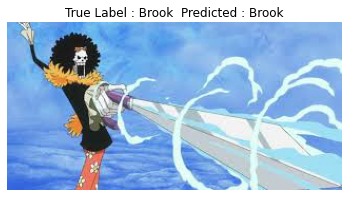

In [166]:
rand =  random.choice(train.class_names)
img = view_random_images(rand)

In [170]:
def view_image(path):

  img = mpimg.imread(path)
  plt.imshow(img)
  plt.axis(False)
  print("the shape of the image is{}".format(img.shape))

  img = tf.io.read_file(path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.resize(img, [256, 256])
  pred = model.predict(tf.expand_dims(img, axis = 0))
  num = tf.argmax(pred, axis=1)
  title = f" Predicted : { train.class_names[num.numpy()[0]]}"
  plt.title(title)



 
  return img


In [1]:
image = view_image("/content/R.png")

NameError: ignored

In [175]:
  img = tf.io.read_file("/content/data/one-piece-image-classifier/Data/Data/{}/{}".format(target_class,rand_image))
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.resize(img, [256, 256])
  pred = model.predict(tf.expand_dims(img, axis = 0))
  num = tf.argmax(pred, axis=1)
  print(num)
  plt.title(f"True Label : {target_class}  Predicted : { train.class_names[num]}")

1/1 [==============================] - 0s 23ms/step
tf.Tensor([0], shape=(1,), dtype=int64)


TypeError: ignored

In [87]:
pred = model.predict(tf.expand_dims(list(valid.take(1))[0][0][0], axis = 0))

1/1 [==============================] - 0s 26ms/step


In [88]:
tf.argmax(pred, axis=1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([5])>

In [89]:
train.class_names[5]

'Franky'

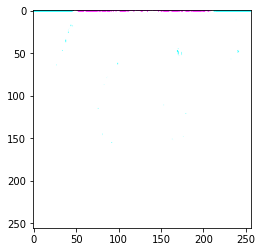